In [ ]:
#DSPM HW2 - Clustering and Prediction
#Submitted by : Vaibhavi Udgirkar
#andrewID : vudgirka

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression


Q1. Perform exploratory analysis on the data and prepare it for modeling. Examine summary
statistics, handle missing values/outliers, make binary and dummy variables where applicable.
Also make sure to normalize the numeric variables before feeding into the models.

In [ ]:
#Reading the csv
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,NaN,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,NaN,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,NaN,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [ ]:
#Summary statistics
df.describe(include = 'all')

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
count,6588,6588,6588.000000,6588,6588.000000,6588,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,2990,6588,5244,5244.000000,5244,5244,5244,5244,5244,5244,5244,5244,6588,6588,6588,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588
unique,6588,2,NaN,2,NaN,4,NaN,NaN,NaN,NaN,NaN,5,2,3,NaN,2,2,2,2,2,2,2,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,2
top,0002-ORFBO,Male,NaN,Yes,NaN,SD,NaN,NaN,NaN,NaN,NaN,Offer B,Yes,Fiber Optic,NaN,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,Stayed
freq,1,3312,NaN,3317,NaN,3762,NaN,NaN,NaN,NaN,NaN,824,5244,2933,NaN,3272,2870,2855,3248,2657,2682,2809,4520,3202,3973,3727,NaN,NaN,NaN,NaN,NaN,NaN,4719
mean,NaN,NaN,46.757438,NaN,0.476169,NaN,93491.512750,36.199980,-119.757549,2.021099,34.494232,NaN,NaN,NaN,26.228261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023,NaN
std,NaN,NaN,16.840793,NaN,0.968555,NaN,1857.716269,2.472582,2.155838,3.024220,23.966333,NaN,NaN,NaN,19.566861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975,NaN
min,NaN,NaN,19.000000,NaN,0.000000,NaN,90001.000000,32.555828,-124.301372,0.000000,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,NaN
25%,NaN,NaN,33.000000,NaN,0.000000,NaN,92103.000000,33.989286,-121.790034,0.000000,12.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500,NaN
50%,NaN,NaN,46.000000,NaN,0.000000,NaN,93526.000000,36.245926,-119.601370,0.000000,32.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000,NaN
75%,NaN,NaN,60.000000,NaN,0.000000,NaN,95333.250000,38.169605,-117.967399,3.000000,57.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500,NaN


In [ ]:
#Missing Values
#Check null values
df.isnull().sum()


,0
viewer_id,0
gender,0
age,0
married,0
number_of_family_dependents,0
city,0
zip_code,0
latitude,0
longitude,0
number_of_referrals,0


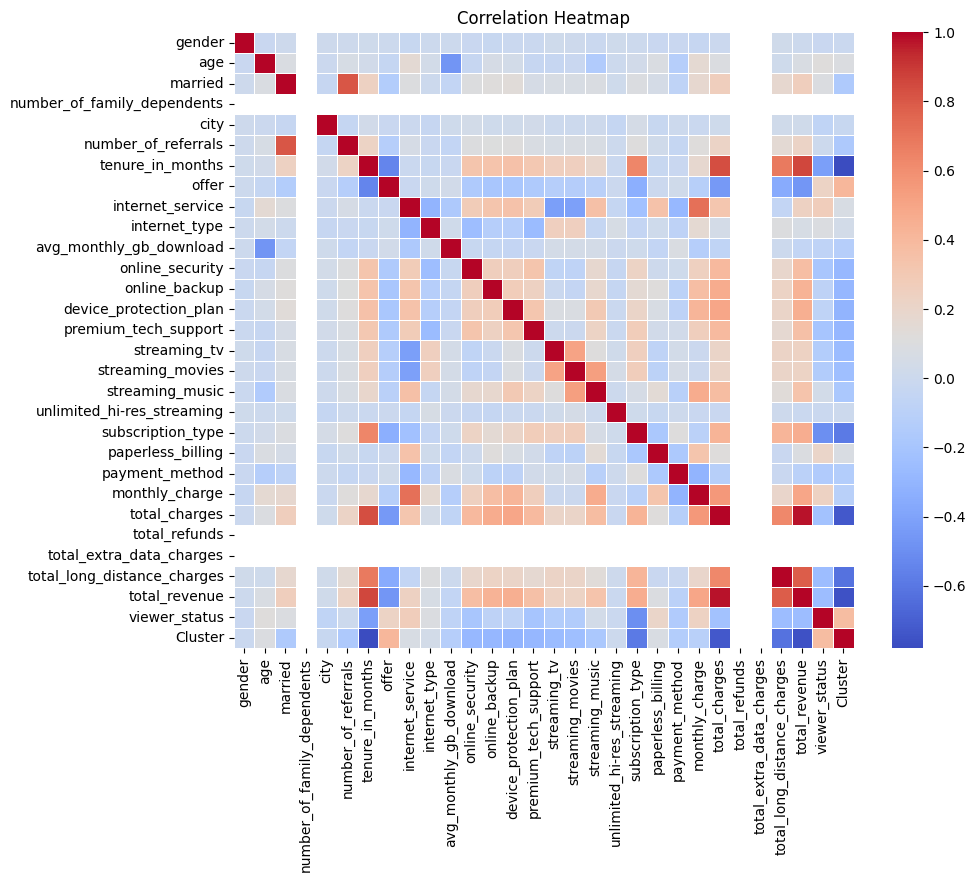

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Handling missing values
#dropping columns that are not required
unrelated_columns = {'viewer_id', 'City', 'zip_code', 'latitude', 'longitude'}
df.drop(columns=unrelated_columns.intersection(df.columns), inplace=True)
df.describe()

,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Columns with a highest missing values are considered for removal, while others will be handled through imputation.

In [ ]:
#Handling missing values
#defining categorical features and numerical features.
categorical_ft = df.select_dtypes(include=['object'])
numerical_ft = df.select_dtypes(include=['int64', 'float64'])

# Defining imputers
assign_categorical = SimpleImputer(strategy='most_frequent')
assign_numerical = SimpleImputer(strategy='mean')

if not categorical_ft.empty:
    categorical_imputed = assign_categorical.fit_transform(categorical_ft)
    df[categorical_ft.columns] = pd.DataFrame(categorical_imputed, columns=categorical_ft.columns, index=df.index)

if not numerical_ft.empty:
    numerical_imputed = assign_numerical.fit_transform(numerical_ft)
    df[numerical_ft.columns] = pd.DataFrame(numerical_imputed, columns=numerical_ft.columns, index=df.index)

# Display results
df.describe()


,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status,Cluster
count,3252.000000,3252.000000,3252.000000,3252.0,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.0,3252.0,3252.000000,3252.000000,3252.000000,3252.000000
mean,0.500308,48.820111,0.267220,0.0,1.557503,0.340713,28.324108,1.626076,0.805966,1.563961,21.830883,0.247540,0.313961,0.323493,0.247232,0.577798,0.585486,0.341328,0.992312,0.602399,0.640221,0.467712,64.912008,1996.840867,0.0,0.0,652.135424,2648.976292,0.416974,1.746002
std,0.500077,16.723710,0.442576,0.0,0.868153,0.700768,23.011334,1.165920,0.395516,0.687297,12.925027,0.431649,0.464172,0.467881,0.431469,0.493986,0.492714,0.474228,0.087355,0.794649,0.480009,0.610482,30.568923,2080.654264,0.0,0.0,773.100785,2635.116682,0.493134,1.139082
min,0.000000,19.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,18.850000,0.0,0.0,0.000000,21.610000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.0,1.000000,0.000000,7.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,39.537500,341.562500,0.0,0.0,60.860000,526.942500,0.000000,1.000000
50%,1.000000,48.000000,0.000000,0.0,1.000000,0.000000,23.000000,1.000000,1.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,71.350000,1182.800000,0.0,0.0,330.440000,1709.025000,0.000000,2.000000
75%,1.000000,62.000000,1.000000,0.0,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,26.228261,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.800000,3079.912500,0.0,0.0,995.152500,4068.860000,1.000000,3.000000
max,1.000000,80.000000,1.000000,0.0,3.000000,3.000000,72.000000,4.000000,1.000000,2.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.650000,8684.800000,0.0,0.0,3372.720000,11529.540000,1.000000,3.000000


For categorical features, we fill the missing values with most frequent values and in case of numerical missing values, we fill those with mean value.

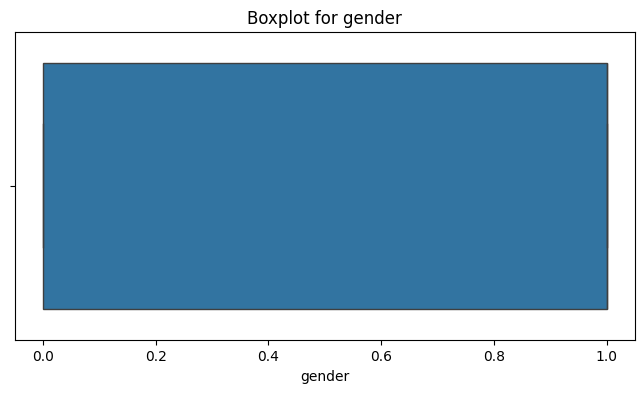

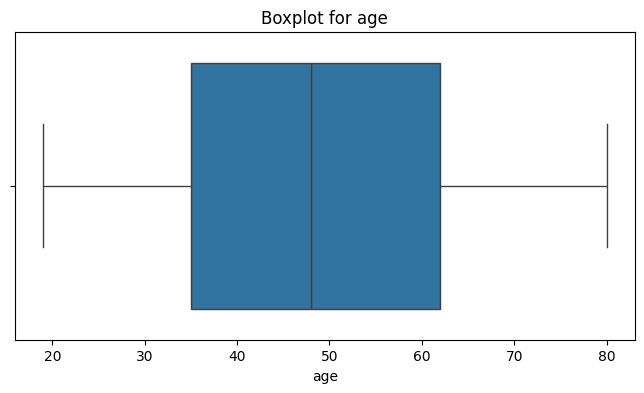

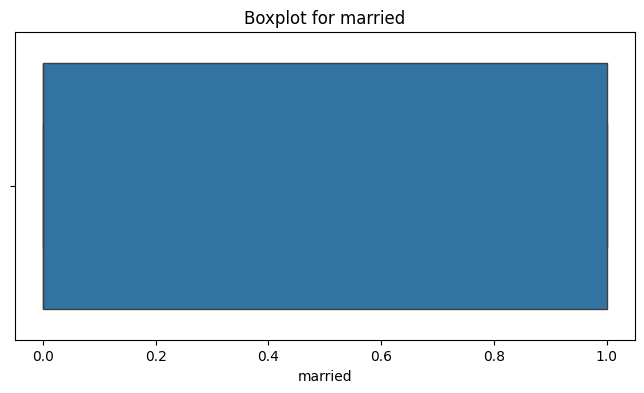

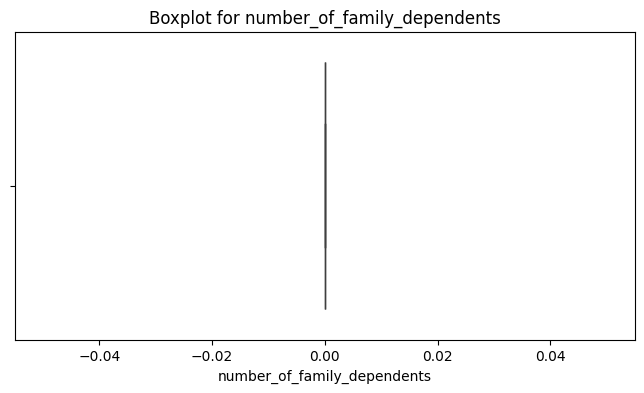

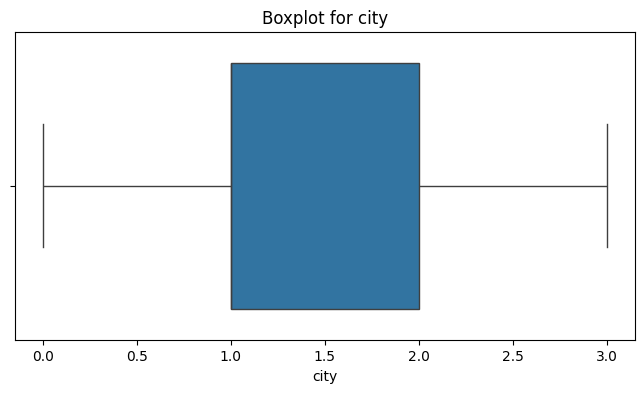

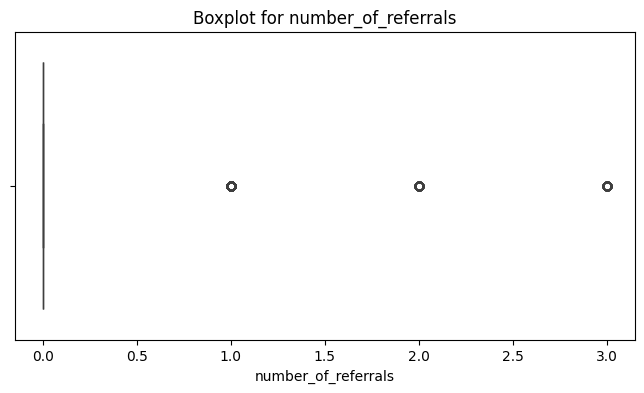

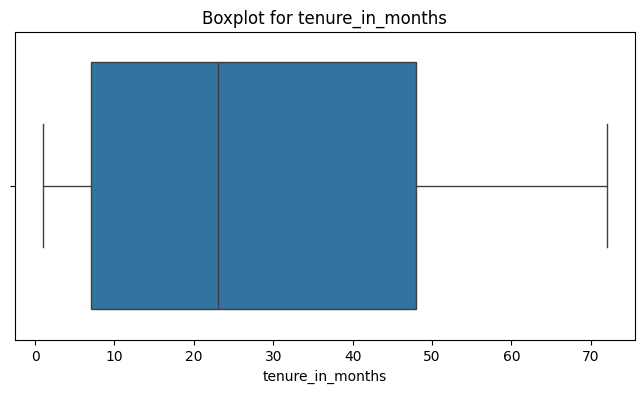

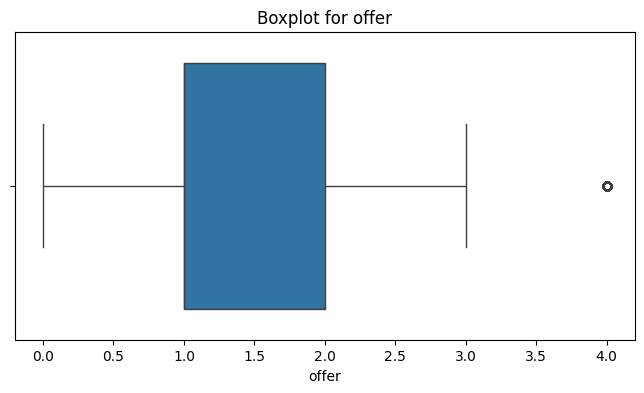

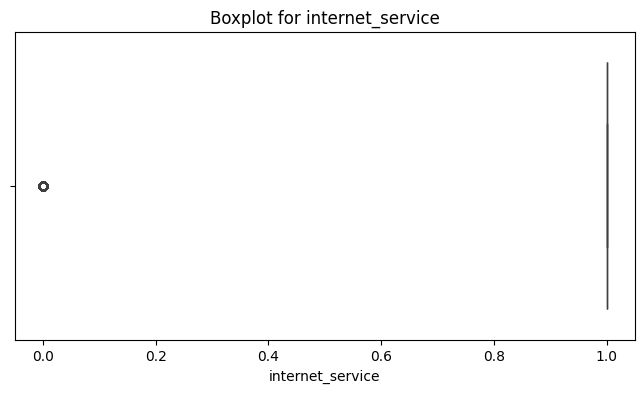

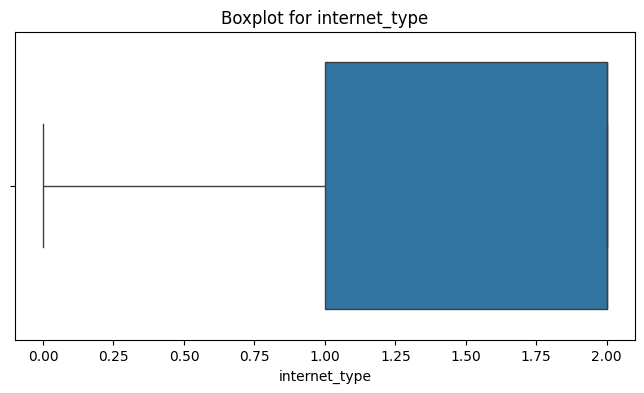

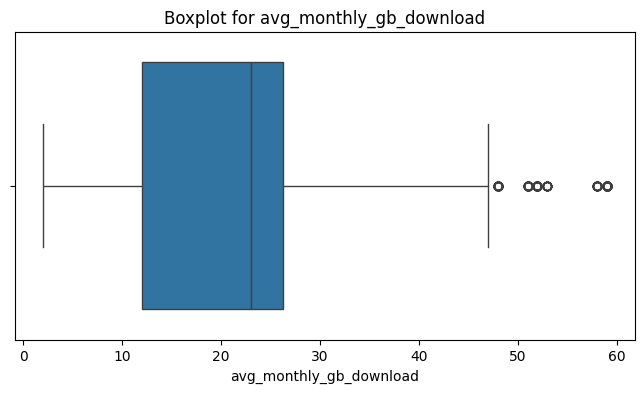

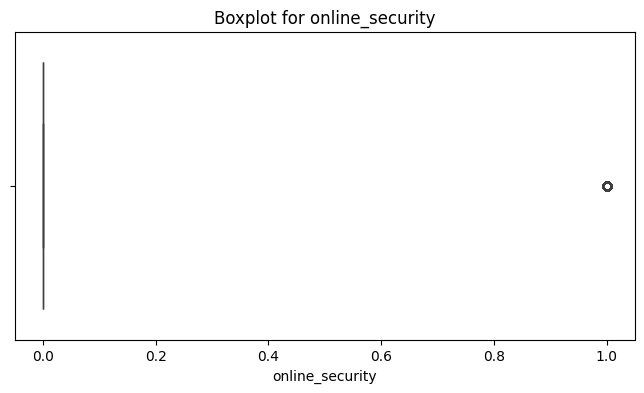

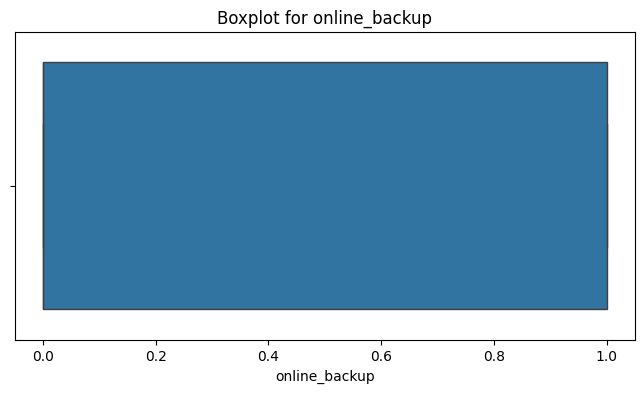

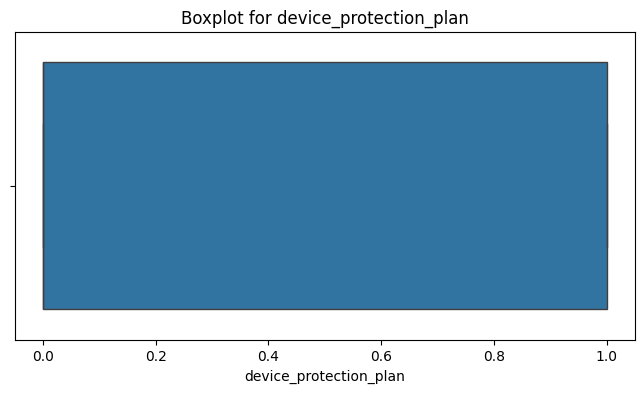

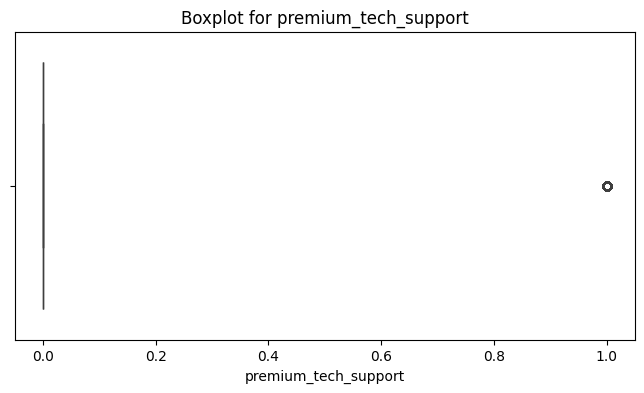

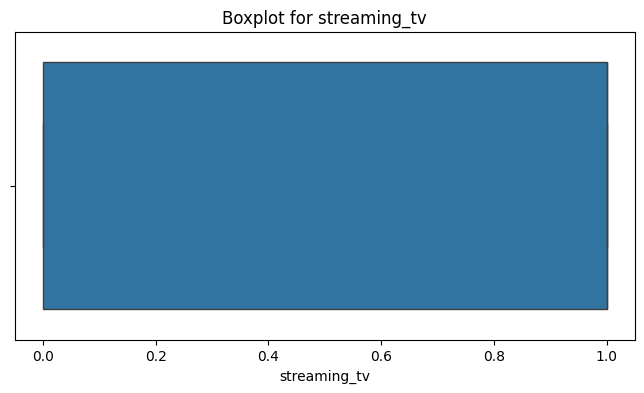

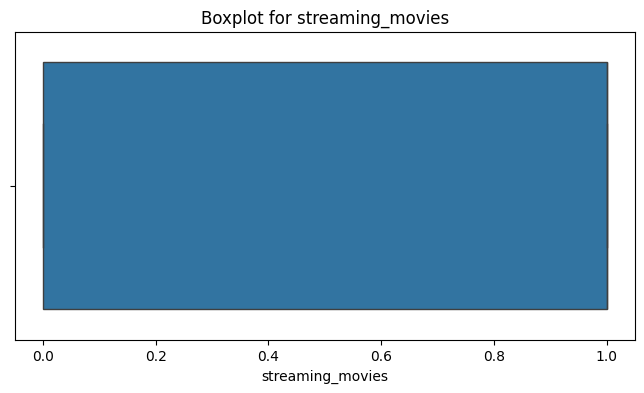

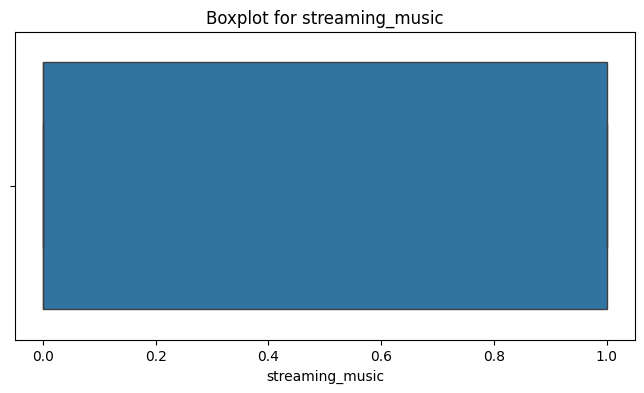

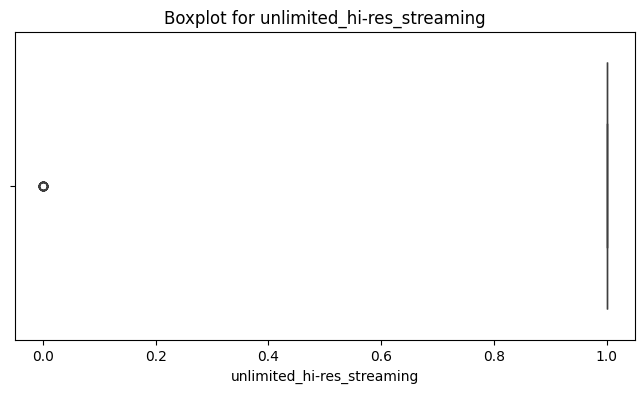

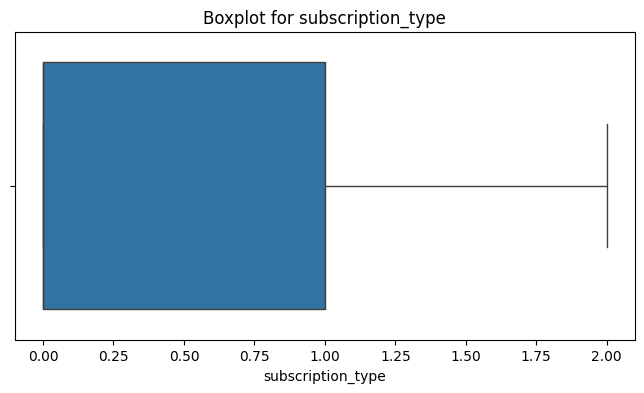

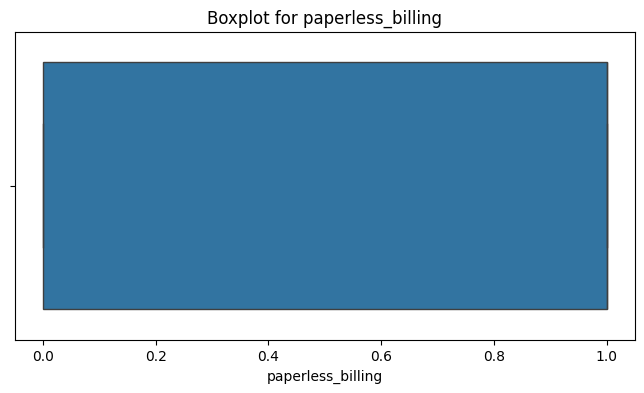

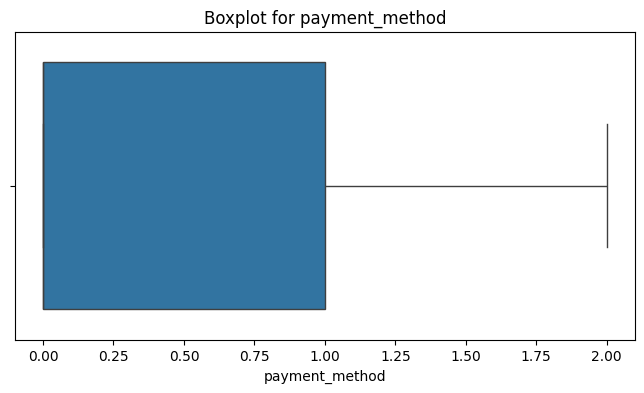

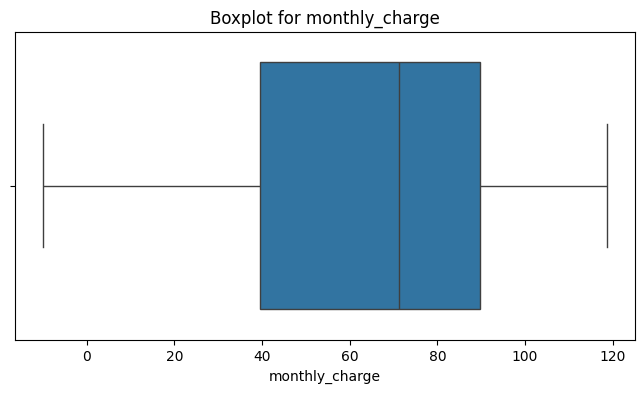

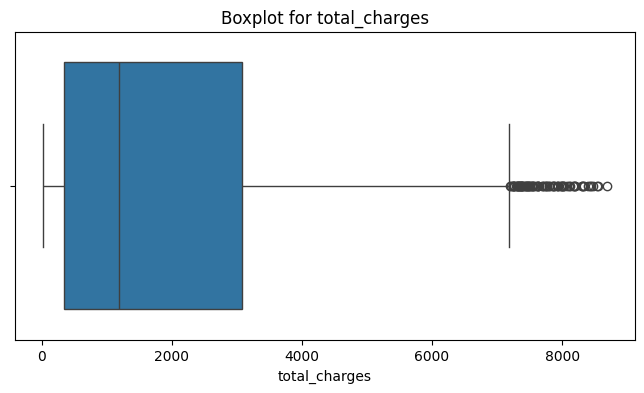

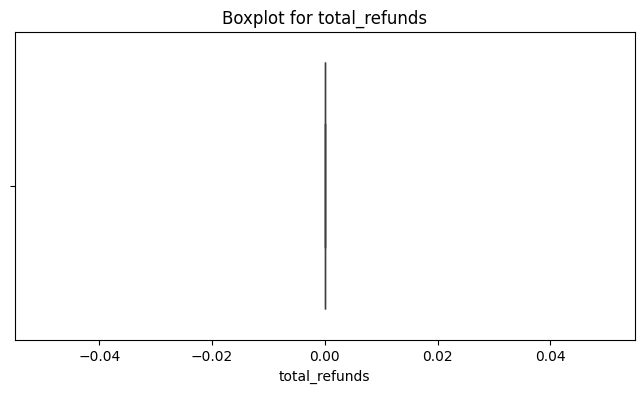

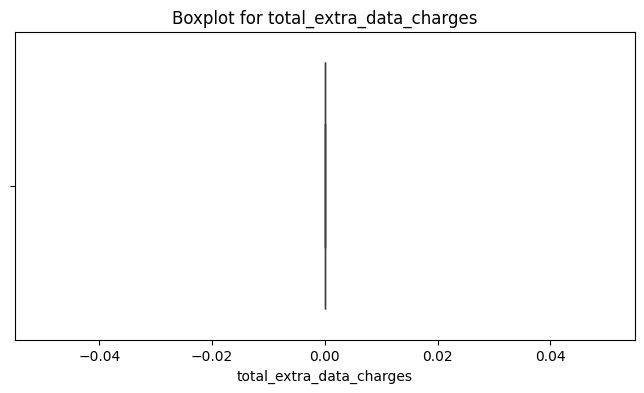

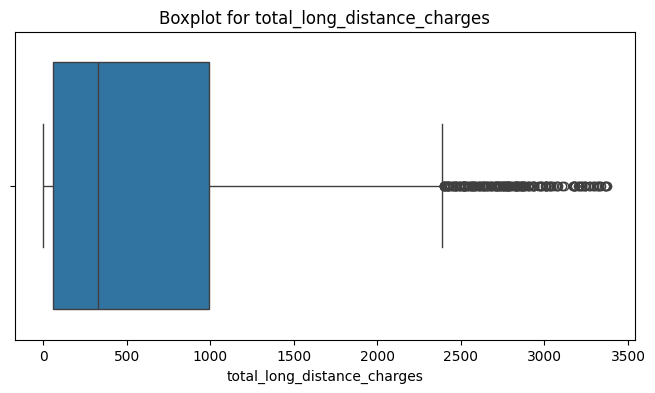

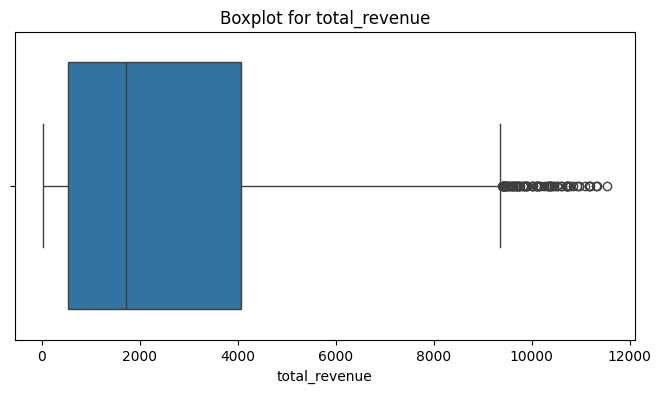

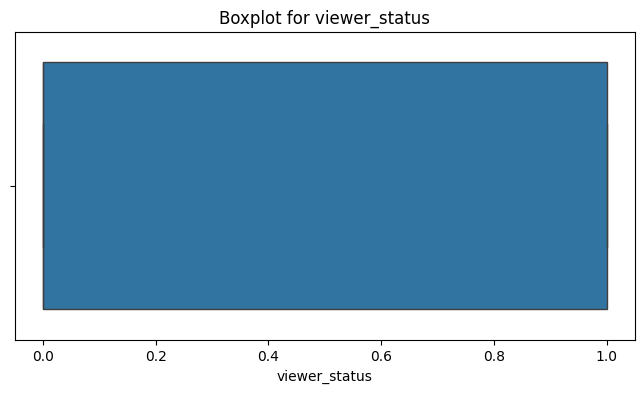

In [ ]:
#Checking for outliers

#First we identify numerical columns for outlier detection
numerical_ft = df.select_dtypes(include=['int64', 'float64']).columns

# Generating boxplots to visualize outliers
for var in numerical_ft:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f"Boxplot for {var}")
    plt.show()

In [ ]:
# Dropping the extreme outliers which are beyond 2.5 times the IQR range
# Identifying numerical columns (excluding categorical and ID columns)

# Applying IQR-based outlier removal
for var in numerical_ft:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    low_lim = Q1 - (2.5 * IQR)
    upp_lim = Q3 + (2.5 * IQR)

    #Filtering out extreme outliers
    df = df[~((df[var] < low_lim) | (df[var] > upp_lim))]



In [ ]:
df

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status,Cluster
2,1.0,50.0,0.0,0.0,1.0,0.0,4.0,4.0,1.0,2.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,73.90,280.85,0.0,0.0,134.60,415.45,1.0,3
7,0.0,68.0,0.0,0.0,1.0,0.0,7.0,4.0,1.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,48.20,340.35,0.0,0.0,73.71,414.06,0.0,3
9,1.0,47.0,0.0,0.0,1.0,0.0,54.0,1.0,1.0,0.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,45.20,2460.55,0.0,0.0,0.00,2460.55,0.0,1
11,0.0,58.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,68.95,351.50,0.0,0.0,93.25,444.75,0.0,3
12,0.0,32.0,0.0,0.0,1.0,0.0,72.0,0.0,1.0,2.0,16.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,101.30,7261.25,0.0,0.0,162.00,7423.25,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,1.0,20.0,0.0,0.0,3.0,0.0,63.0,1.0,1.0,0.0,59.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,68.80,4111.35,0.0,0.0,2417.31,6528.66,0.0,0
6576,0.0,55.0,0.0,0.0,3.0,0.0,28.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,54.65,1517.50,0.0,0.0,716.52,2234.02,0.0,3
6581,0.0,20.0,0.0,0.0,0.0,0.0,7.0,4.0,1.0,2.0,42.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,94.05,633.45,0.0,0.0,255.43,888.88,0.0,2
6582,0.0,53.0,0.0,0.0,3.0,0.0,1.0,4.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,70.15,70.15,0.0,0.0,42.09,112.24,1.0,3


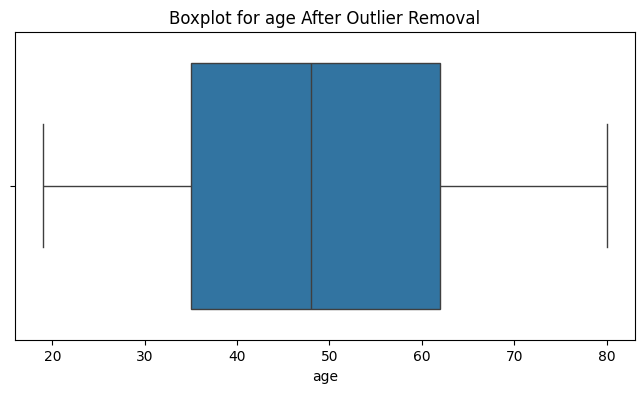

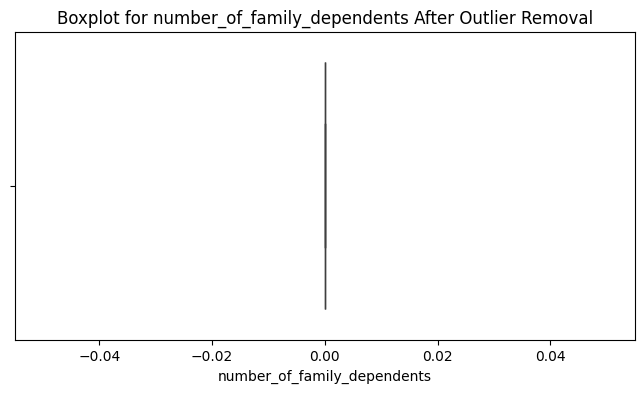

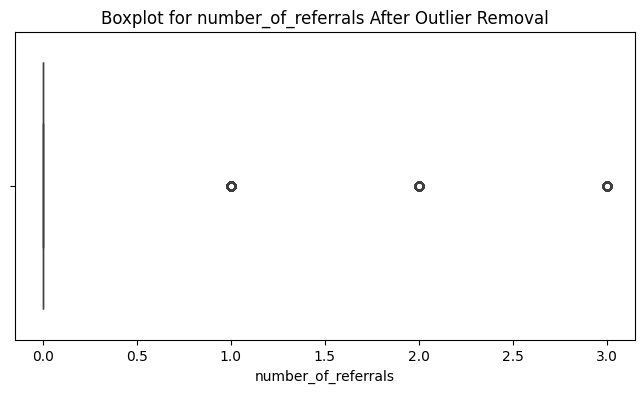

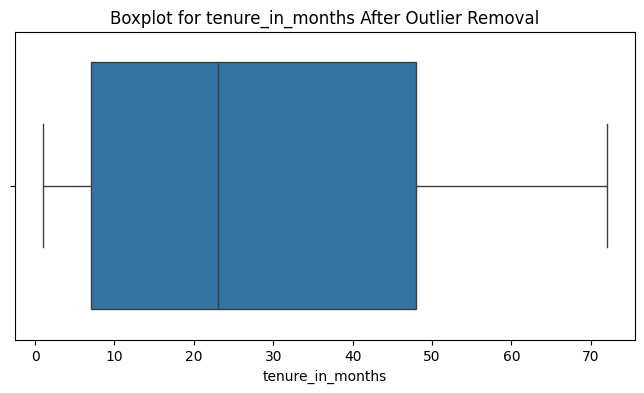

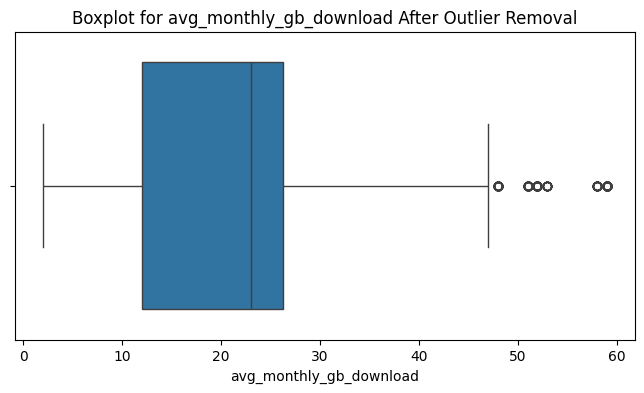

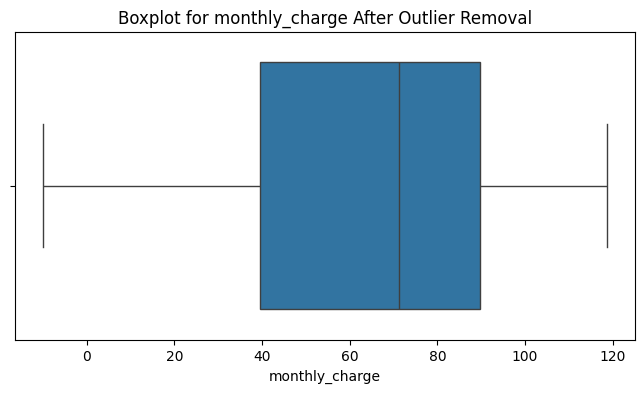

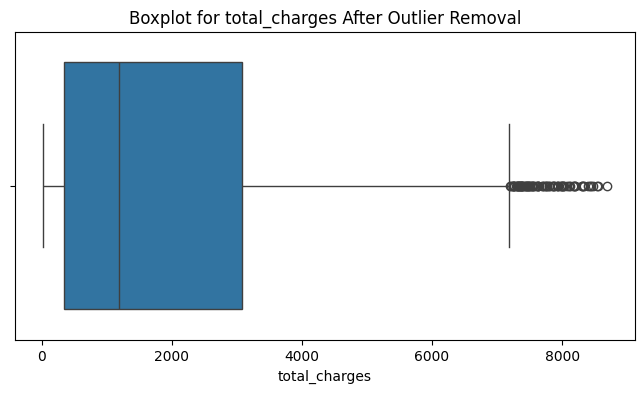

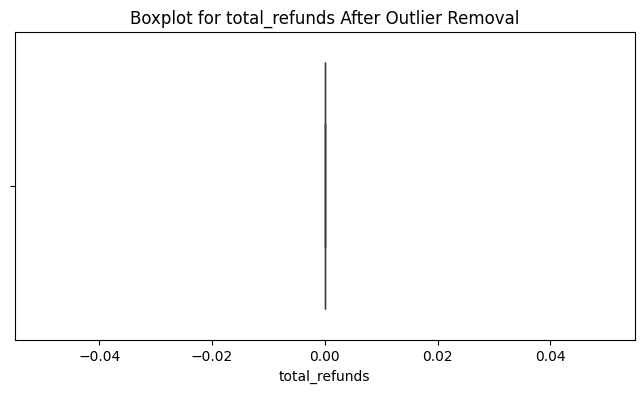

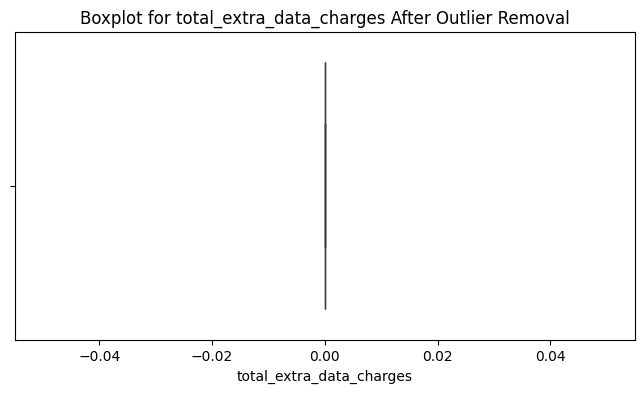

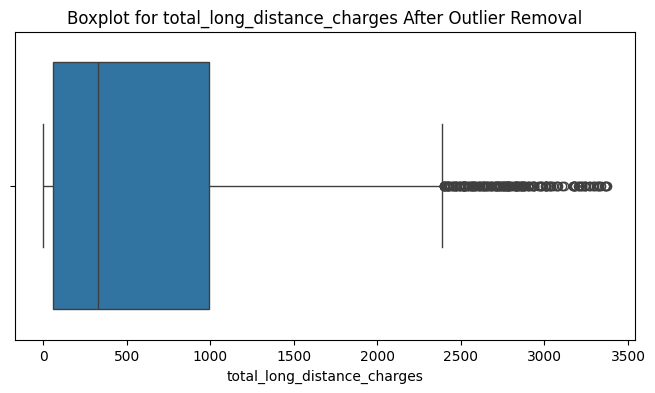

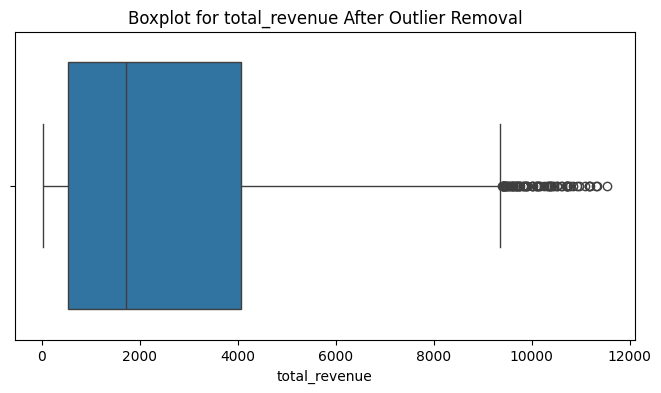

In [ ]:

#Now we generate boxplots after outlier removal to visualize remaining distributions
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for var in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f"Boxplot for {var} After Outlier Removal")
    plt.show()


Transforming categorical variables into numerical format before feeding to models.

In [ ]:
binary_variables = ['married', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan',
               'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming',
               'paperless_billing', 'viewer_status']

df[binary_variables] = df[binary_variables].replace({'Yes': 1, 'No': 0})

#Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

#Applying Label Encoding
for columns in categorical_cols:
    df[columns] = LabelEncoder().fit_transform(df[col])


Q2. Explore if there are segments of customers with similar account profiles and churn rates. Use
clustering and explain your choice of number of clusters.

Creating a scaled version of the dataset to normalise the numerical features

In [ ]:
df_scaled = df.copy()

# Identify numerical columns that should be scaled (excluding binary columns)
numerical_ft = [col for col in df.columns if col not in binary_variables]

# Normalizing continuous numerical features
scaler = StandardScaler()
df_scaled[numerical_ft] = scaler.fit_transform(df[numerical_ft])

In [ ]:
#Performing Segmentation
len(df_scaled.columns)

30

In [ ]:
#Making a df of only the scaled features
pca = PCA()
scaled_features = pd.DataFrame()

for var in df_scaled.columns:
    if var not in binary_columns:
        scaled_features[var] = df_scaled[var]

pca.fit(scaled_features)

PCA()

In [ ]:
# let's check the explained variance
pca.explained_variance_ratio_

array([3.59337929e-01, 1.32280176e-01, 1.07869441e-01, 7.24771102e-02,
       7.05491145e-02, 6.16494700e-02, 5.30783089e-02, 4.28409615e-02,
       3.36236287e-02, 2.45139130e-02, 2.31621692e-02, 1.54015027e-02,
       3.21627536e-03, 4.28925889e-17, 1.73274041e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

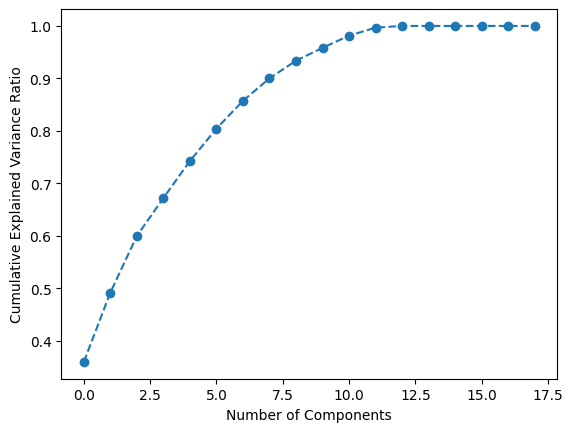

In [ ]:
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

# Label the x-axis
plt.xlabel('Number of Components')

# Label the y-axis
plt.ylabel('Cumulative Explained Variance Ratio')

In [ ]:
# Performing PCA with 10 components
pca = PCA(n_components = 10)
pca.fit(scaled_features)

PCA(n_components=10)

In [ ]:
scores_pca = pca.transform(scaled_features)
scores_pca

array([[-2.28869536,  0.99071571,  1.08051003, ...,  0.19876318,
         0.28028865, -0.25181863],
       [-1.74888183, -0.27554612, -1.42789966, ...,  1.57215186,
         0.34523002, -0.18903632],
       [ 1.05839497, -2.69904144, -1.8539424 , ...,  1.20241393,
        -0.92970116,  0.40934272],
       ...,
       [-1.11808231, -0.37620498,  2.43458102, ...,  1.2713027 ,
        -0.66445504,  0.17412151],
       [-2.45486882,  0.61681227, -0.46462831, ..., -0.18512406,
        -0.52406357, -0.43644228],
       [-0.82425308, -2.47021714,  2.04448068, ...,  0.62336803,
         0.48789722, -0.16958037]])

Clustering

In [ ]:
#Checking up for upto 20 clusters
#Within-cluster sum of squares
wcss = []

for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

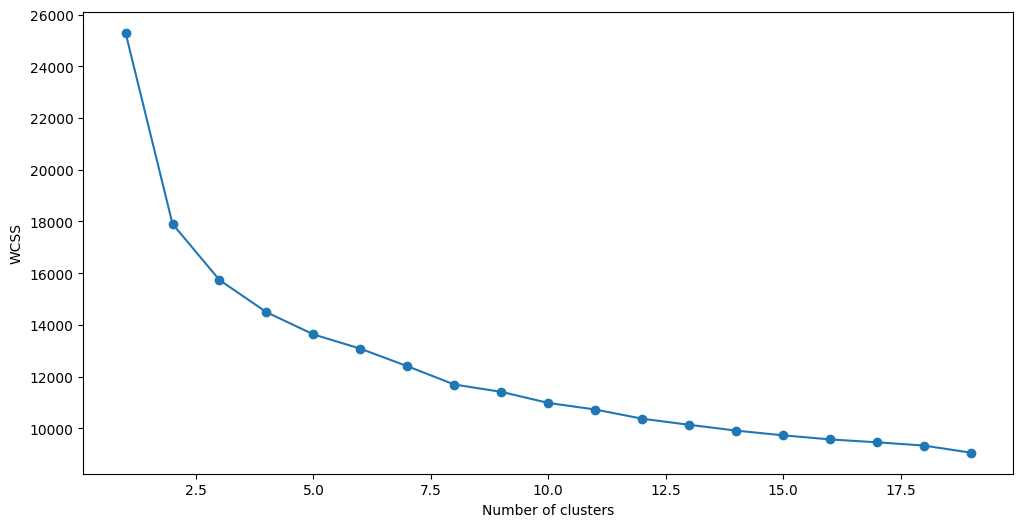

In [ ]:
# Deciding on the number of clusters using elbow method

plt.figure(figsize=(12,6))
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the graph, the elbow seems to appear around k = 4 or k = 5.

We can see that before k=4, the WCSS drops significantly and
after k=4 or k=5, the reduction in WCSS becomes gradual.

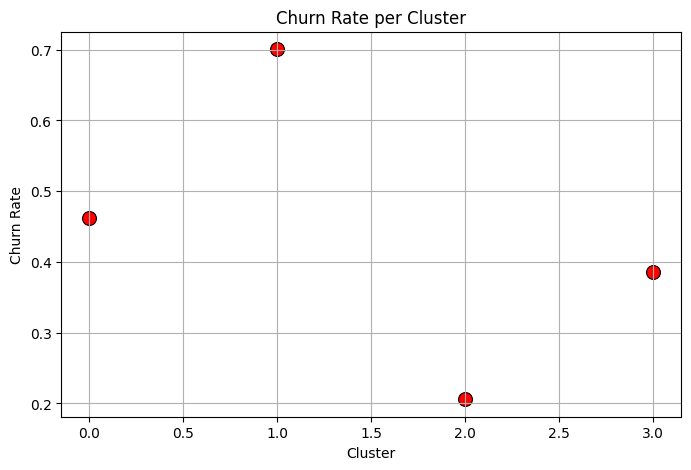

In [ ]:
#Now Calculating k-means with 4 clusters

kmeans_pca = KMeans(n_clusters= 4, init='k-means++', n_init=10, random_state=42)
cluster_pca_labels = kmeans_pca.fit_predict(scores_pca)
cluster_pca_labels

df = df.copy()
df['Cluster'] = cluster_pca_labels

#Visualizing the clusters

if 'Cluster' not in df.columns:
    print("Error: Column 'Cluster' not found in df")
else:
    #Computing churn rate per cluster
    churn_per_cluster = df.groupby('Cluster')['viewer_status'].mean().reset_index()
    churn_per_cluster.columns = ['Cluster', 'Churn Rate']

    #Seaborn scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Cluster', y='Churn Rate', data=churn_per_cluster, color='red', s=100, edgecolor='black')

    #Labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Churn Rate')
    plt.title('Churn Rate per Cluster')
    plt.grid(True)

    # Show the plot
    plt.show()


Q3. Build two models to predict churn using different supervised learning approaches. What are the
top 5 most predictive factors? How do the models compare in terms of accuracy?

Prediction through Supervised Learning.

In [ ]:
#Before we run a model, we need to reduce the number of features and exclude the highly correlated ones

In [ ]:
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [ ]:
print("Initial shape:", X.shape)

Initial shape: (3252, 28)


In [ ]:
#Defining total as a list of column names
total = df_scaled.columns.tolist()

#Excluding the first 5 columns
use_features = remove_collinear_features(df_scaled[total[5:]], 0.4)

#Displaying the updated features
print("Shape after removing collinear features:", use_features.shape)


Removed Columns {'subscription_type', 'total_revenue', 'monthly_charge', 'Cluster', 'viewer_status', 'total_long_distance_charges', 'total_charges', 'offer', 'streaming_music', 'streaming_movies'}
Shape after removing collinear features: (1886, 15)


In [ ]:
# computing VIF to confirm the high collinearity which exists between the features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[total[7:]]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF,Column
20,inf,total_revenue
19,inf,total_long_distance_charges
16,inf,total_charges
9,3.774510,streaming_movies
10,3.305383,streaming_music
15,2.940950,monthly_charge
2,2.347710,internet_type
22,2.339202,Cluster
12,1.793844,subscription_type
8,1.469303,streaming_tv


In [ ]:
#Splitting dataset into training and testing sets
#Defining X (features) and y (target variable)
X = df_scaled.drop(columns=['viewer_status'])
y = df_scaled['viewer_status']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Performing Logistic Regression

In [ ]:
#Performing Logistic Regression
log_regression = LogisticRegression(random_state=42, max_iter=1000)
log_regression.fit(X_train, y_train)
y_pred_log_regression = log_regression.predict(X_test)

#Evaluating Logistic Regression
accuracy_log_regression = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_regression:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_regression))



Logistic Regression Accuracy: 0.7778
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       204
         1.0       0.72      0.85      0.78       174

    accuracy                           0.78       378
   macro avg       0.78      0.78      0.78       378
weighted avg       0.79      0.78      0.78       378



Top 5 features by Logistic Regression

In [ ]:
#Applying SelectKBest to choose the top 5 features
kbest = SelectKBest(score_func=f_classif, k=5)
X_train_selected = kbest.fit_transform(X_train, y_train)
X_test_selected = kbest.transform(X_test)

#To get selected feature names
selected_feature_indices = kbest.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_feature_indices]

#Extracting the coefficients
coefficients = log_reg.coef_.flatten()

if len(selected_features) == len(coefficients):
    log_feature_importances = pd.DataFrame({
        'Feature': selected_features,
        'Importance': np.abs(coefficients)
    }).sort_values(by='Importance', ascending=False)

    # Get the top 5 most important features
    top_5_log_features = log_feature_importances.head(5)

    #Printing the results
    print("\nTop 5 Features for Logistic Regression:")
    print(top_5_log_features)
else:
    print(f" Mismatch: Selected Features = {len(selected_features)}, Coefficients = {len(coefficients)}")



Top 5 Features for Logistic Regression:
             Feature  Importance
0   tenure_in_months    2.841847
2      total_charges    1.961389
1  subscription_type    0.918554
3      total_revenue    0.188479
4            Cluster    0.094846


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 3  5  8 18 24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Performing Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7937
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       204
         1.0       0.80      0.73      0.77       174

    accuracy                           0.79       378
   macro avg       0.80      0.79      0.79       378
weighted avg       0.79      0.79      0.79       378



Top 5 features by Random Forest

In [ ]:

# Extract feature importance
rf_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Get the top 5 most important features
top_5_rf_features = rf_feature_importances.head(5)

# Print the top features
print("Top 5 Features for Random Forest:")
print(top_5_rf_features)


Top 5 Features for Random Forest:
              Feature  Importance
6    tenure_in_months    0.144412
19  subscription_type    0.126713
27      total_revenue    0.109147
23      total_charges    0.101539
22     monthly_charge    0.101041


From the above results we can conclude that, the Random Forest Classifier performed better [79.37%] than Logistic Regression [77.78%] in terms of accuracy. In general, Random forest handles non linearity and any interactions between variables better than the Logistic Regression.

Q4. Based on the clustering models, which customer segment in the data is most at risk for churn?
What actions would you recommend to reduce churn for this segment? (4 points)

Customer segment 1 has the highest turnover rate, as seen in the scatter figure above (title: Churn Rate per Cluster).
With almost 70% of customers quitting the service, this suggests that Cluster 3 users are most at danger of churn. The leading factors contributing to churn, according to the predictive feature study, were tenure in months, the total revenue, total charges, subscription type, and monthly charges.
This proves that customers are more likely to discontinue a service if they have a shorter tenure and have to pay more, or have a certain subscription type. KNet-Flicks could use flexible pricing plans, targeted retention offers, and loyalty programs, , offer family plans, free upgrades etc to keep these at-risk clients and lower turnover.
Additionally, churn rates can be considerably reduced by increasing service quality & improving customer assistance. Retention can be further improved by proactive measures like targeted contact to unhappy clients, bundled service incentives, and discounts for long-term commitments.